# 基础绘图功能 - 以折线图为例

## 学习目标

- 了解Matplotlib
- 掌握绘图行添加辅助功能（标注、xy轴名称、标题等）
- 知道图形的保存
- 知道如何多次plot绘制图像
- 知道如何多个坐标系显示图形
- 知道折线图的应用场景
---

## 1 认识Matplotlib图像结构

Matplotlib的三层结构包括：
- 容器层：Canvas：画板、Figure：画布、坐标系：Axes
    
- 辅助层：刻度，坐标标题，网格，图例，图像标题
- 图像层：折线图，数点图，柱状图，直方图，饼状图
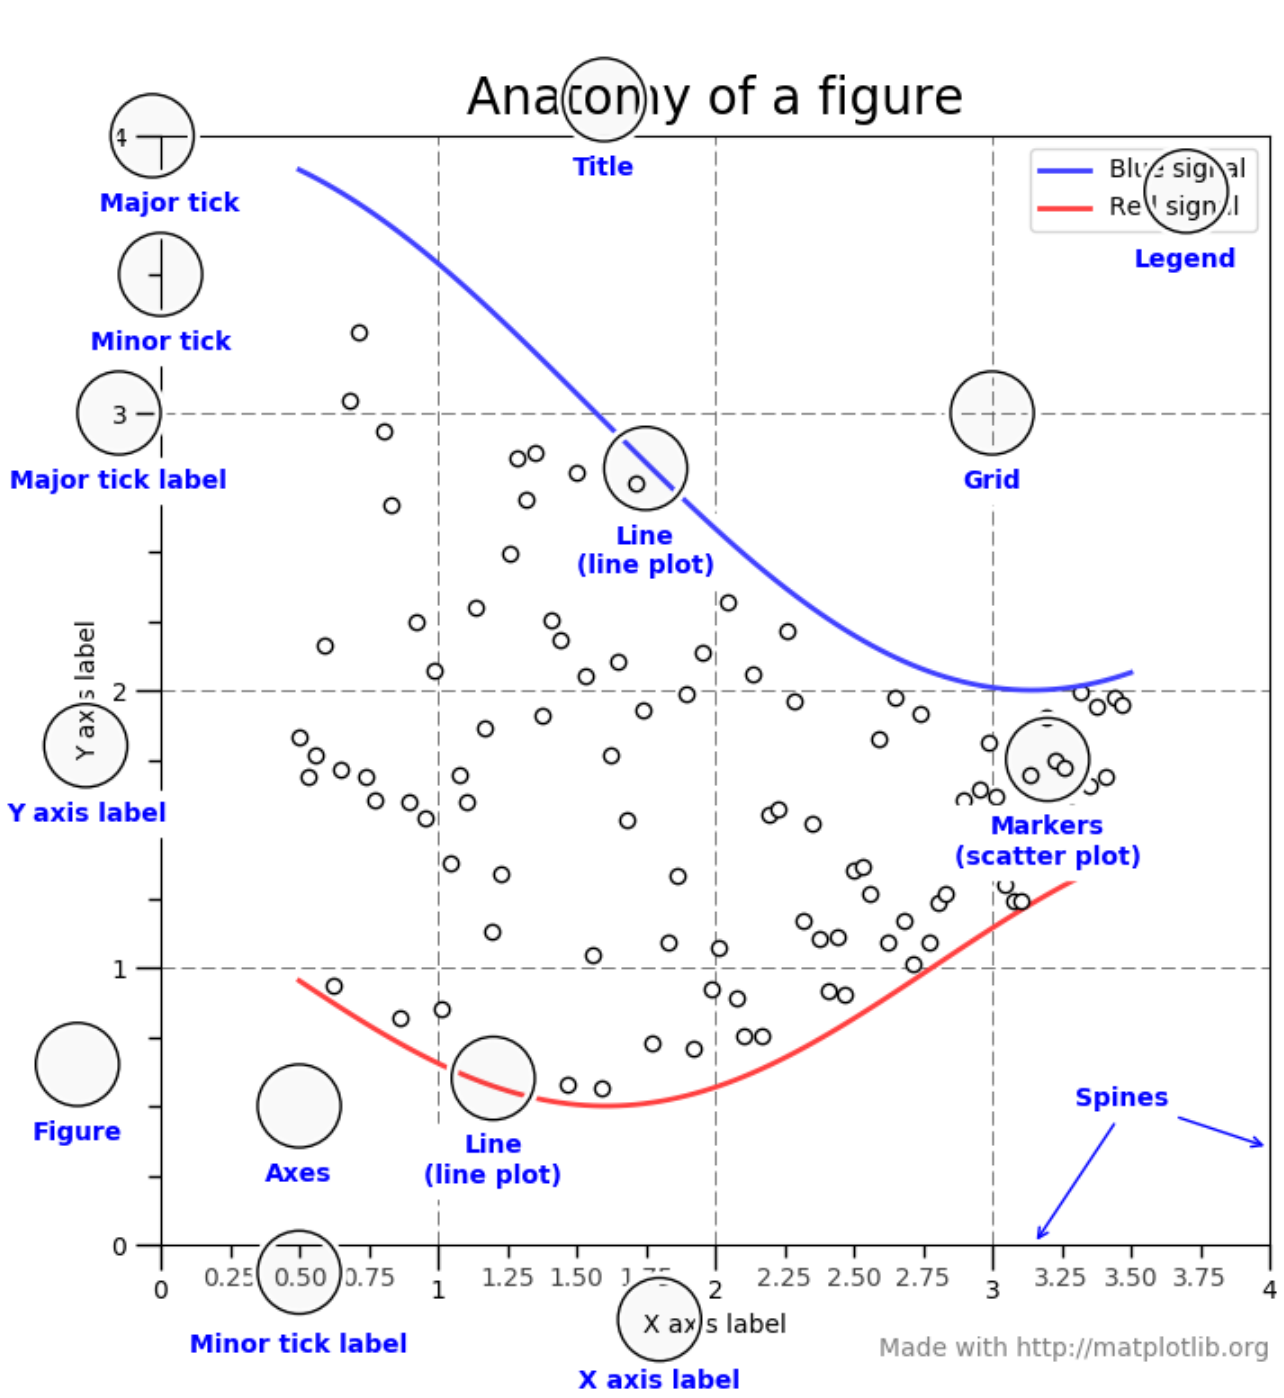



### 1.1 绘制图形流程
- 导入模块：

<code>import matplotlib.pyplot as plt</code>
- 创建画布： 

<code>plt.figure(figsize=(),dpi=)
    figsize:指定图的长宽
    dpi：图像的清晰度
</code>

- 绘制图像：<code>plt.plot(x,y)</code>
- 显示图像：<code>plt.show()</code>


### 一、 完善原始折线图 - 给图形添加辅助功能

**需求：画出某城市11点到12点1小时内每分钟的温度变化折线图，温度范围在15°-18°**

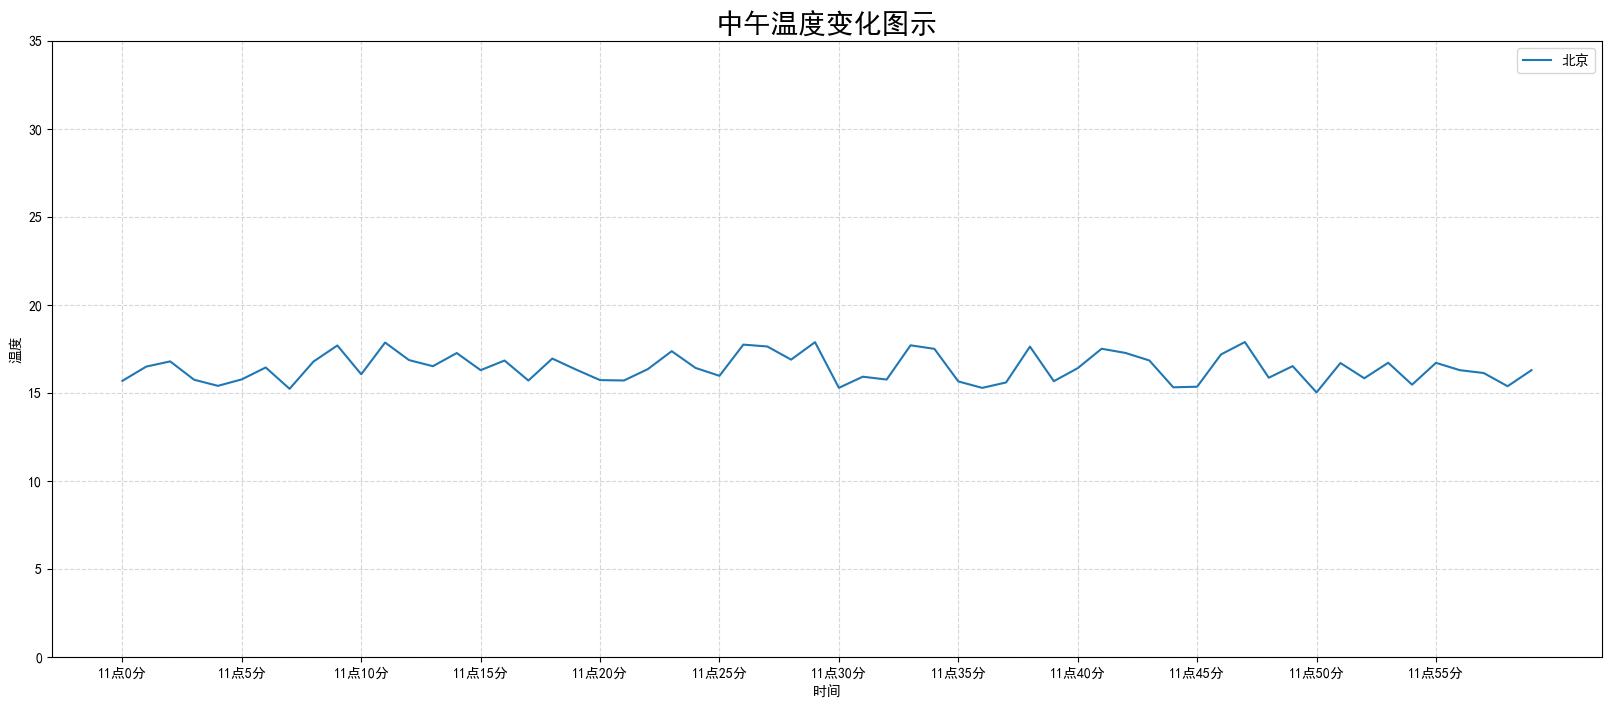

In [43]:
import random
import matplotlib.pyplot as plt

# 显示中文字符和设置正常显示符号
from pylab import mpl
mpl.rcParams["font.sans-serif"] = ["SimHei"]
mpl.rcParams["axes.unicode_minus"] = False

# 画出温度变化图, x创建60个数据，y是列表生成式，随机生成60个15-18的数据
x = range(60)
y_shanghai = [random.uniform(15, 18) for i in x]

# 1. 创建画布
plt.figure(figsize=(20, 8), dpi=100)

# 2. 绘制折线图
plt.plot(x,y_shanghai,label="北京")

# 3. 设置x,y轴刻度
x_ticks_label = ["11点{}分".format(i) for i in x]
y_ticks = range(40)

# 4. 修改x,y轴坐标刻度显示
plt.xticks(x[::5],x_ticks_label[::5])
plt.yticks(y_ticks[::5])

#5. 添加网格显示
plt.grid(True, linestyle="--", alpha=0.5)

#6. 添加描述信息
plt.xlabel("时间")
plt.ylabel("温度")
plt.title("中午温度变化图示",fontsize=20)

# 添加图例
plt.legend(loc=0)

#7. 图像保存
plt.savefig("test.png")

# 8. 显示图像
plt.show()

#### 添加网格显示

为了更清楚的观察图形的对应的值

<code>plt.grid(True, linestyle="--", alpha=0.5)</code>

#### 添加描述信息

添加x轴，y轴描述信息及标题

<code>plt.xlabel("时间")
plt.ylabel("温度")
plt.title("中午温度变化图示"，fontsize=20)
</code>

### 二、一个坐标系中绘制多个图像

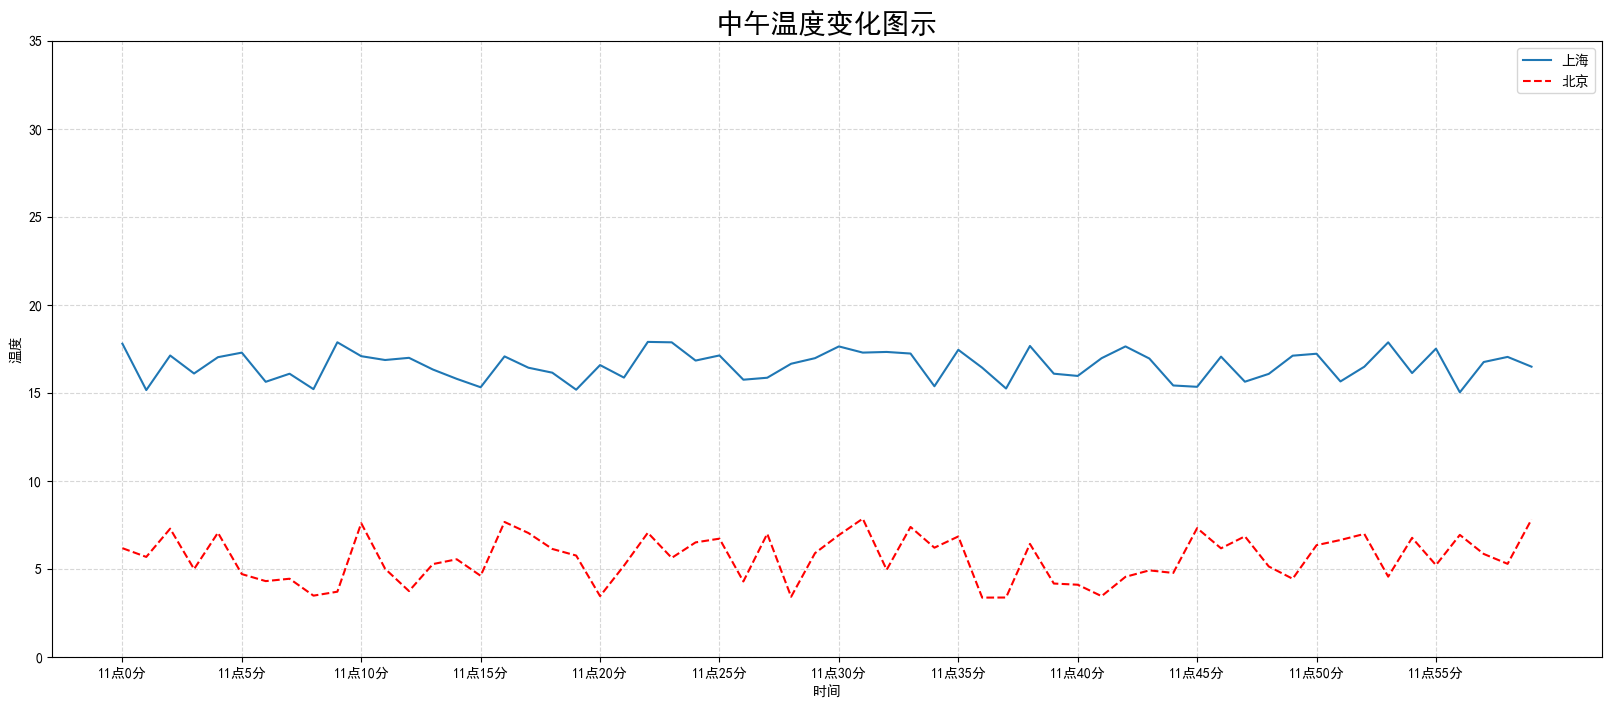

In [46]:
import random
import matplotlib.pyplot as plt

# 显示中文字符和设置正常显示符号
from pylab import mpl
mpl.rcParams["font.sans-serif"] = ["SimHei"]
mpl.rcParams["axes.unicode_minus"] = False

# 画出温度变化图, x创建60个数据，y是列表生成式，随机生成60个15-18的数据
x = range(60)
y_shanghai = [random.uniform(15, 18) for i in x]
y_beijing = [random.uniform(3,8) for i in x]

# 1. 创建画布
plt.figure(figsize=(20, 8), dpi=100)

# 2. 绘制折线图
plt.plot(x,y_shanghai,label="上海")
plt.plot(x,y_beijing, color="r", linestyle="--",label="北京")

# 3. 设置x,y轴刻度
x_ticks_label = ["11点{}分".format(i) for i in x]
y_ticks = range(40)

# 4. 修改x,y轴坐标刻度显示
plt.xticks(x[::5],x_ticks_label[::5])
plt.yticks(y_ticks[::5])

#5. 添加网格显示
plt.grid(True, linestyle="--", alpha=0.5)

#6. 添加描述信息
plt.xlabel("时间")
plt.ylabel("温度")
plt.title("中午温度变化图示",fontsize=20)

# 添加图例
plt.legend(loc=0)

#7. 图像保存
plt.savefig("test.png")

# 8. 显示图像
plt.show()

### 三、多坐标系下绘制多个图像显示 --plt.subplots(面向对象的画图方法)

subplots 可以创建一个带有对各axes（坐标系、绘图区）的图

其中函数返回值为：

fig：图对象

axes：返回对应数量的坐标系

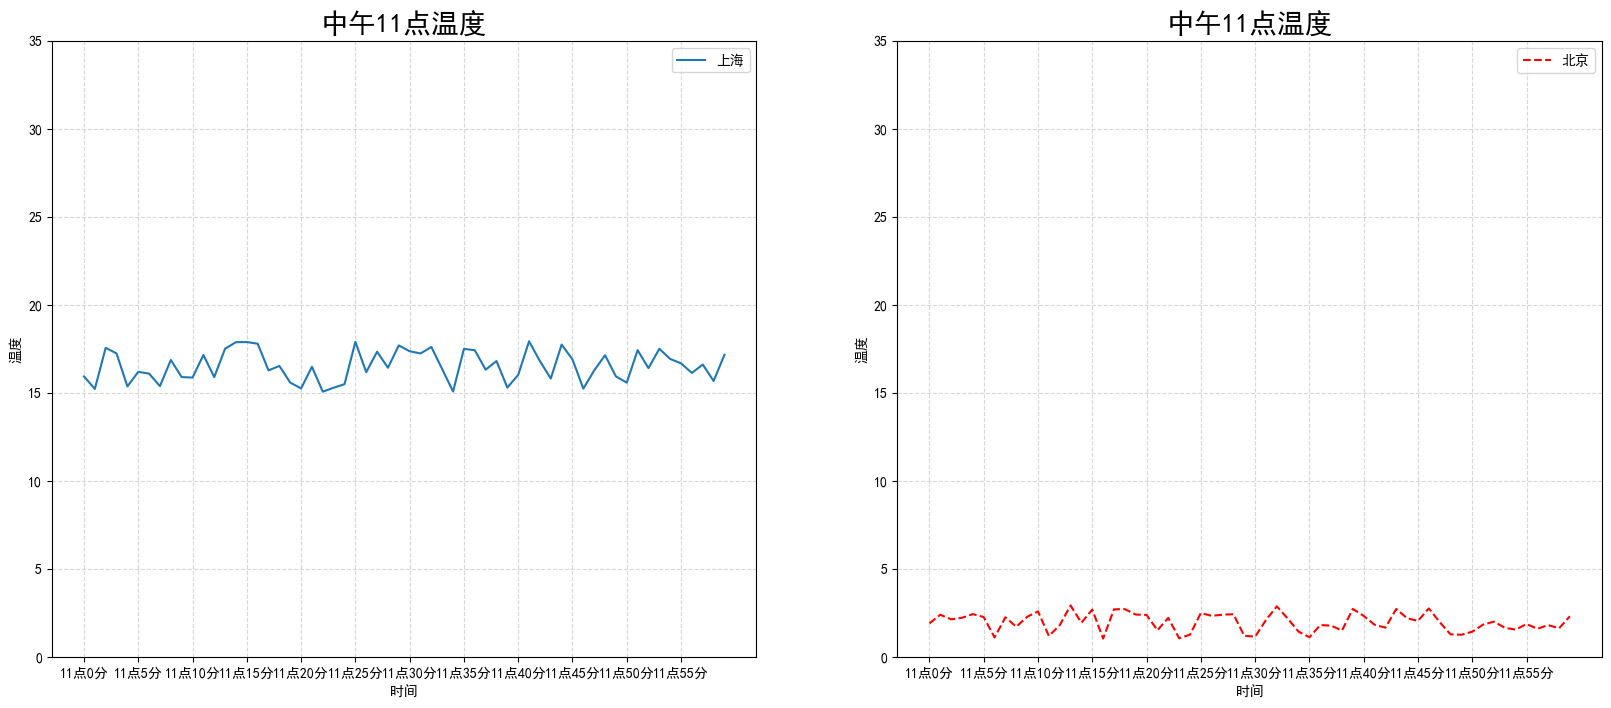

In [44]:
import random
import matplotlib.pyplot as plt

# 显示中文字符和设置正常显示符号
from pylab import mpl
mpl.rcParams["font.sans-serif"] = ["SimHei"]
mpl.rcParams["axes.unicode_minus"] = False

# 准备数据
# 画出温度变化图, x创建60个数据，y是列表生成式，随机生成60个15-18的数据
x = range(60)
y_shanghai = [random.uniform(15, 18) for i in x]
y_beijing = [random.uniform(1,3) for i in x]


# 1. 创建画布,nrows代表几行，ncols代表几列
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8), dpi=100)
# plt.figure(figsize=(20, 8), dpi=100)

# 2. 绘制折线图
axes[0].plot(x,y_shanghai, label="上海")
axes[1].plot(x,y_beijing, color="r", linestyle="--",label="北京")

# plt.plot(x,y_shanghai, label="上海")
# plt.plot(x,y_beijing, color="r", linestyle="--",label="北京")

 # 3. 设置x,y轴刻度
x_ticks_label = ["11点{}分".format(i) for i in x]
y_ticks = range(40)

# # 4. 修改x,y轴坐标刻度显示
axes[0].set_xticks(x[::5])
axes[0].set_yticks(y_ticks[::5])
axes[0].set_xticklabels(x_ticks_label[::5])# 因为有字符串，要单独设置
axes[1].set_xticks(x[::5])
axes[1].set_yticks(y_ticks[::5])
axes[1].set_xticklabels(x_ticks_label[::5])# 因为有字符串，要单独设置

# plt.xticks(x[::5],x_ticks_label[::5])
# plt.yticks(y_ticks[::5])

# #5. 添加网格显示
axes[0].grid(True, linestyle="--", alpha=0.5)
axes[1].grid(True, linestyle="--", alpha=0.5)
# plt.grid(True, linestyle="--", alpha=0.5)

# #6. 添加描述信息
axes[0].set_xlabel("时间")
axes[0].set_ylabel("温度")
axes[0].set_title("中午11点温度", fontsize=20)
axes[1].set_xlabel("时间")
axes[1].set_ylabel("温度")
axes[1].set_title("中午11点温度",fontsize=20)
# plt.xlabel("时间")
# plt.ylabel("温度")
# plt.title("中午温度变化图示",fontsize=20)

# #7. 图像保存
# plt.savefig("test.png")

# 显示图例
axes[0].legend(loc=0)
axes[1].legend(loc=0)


# 8. 显示图像
plt.show()

### 四、折线图的应用场景

绘制各种数学公式函数图像

In [35]:
import numpy as np

In [37]:
# 1. 准备数据
x = np.linspace(-10,10,1000)
y = np.sin(x)

In [38]:
# 2. 创建画布
plt.figure(figsize=(20,8), dpi=100)

<Figure size 2000x800 with 0 Axes>

<Figure size 2000x800 with 0 Axes>

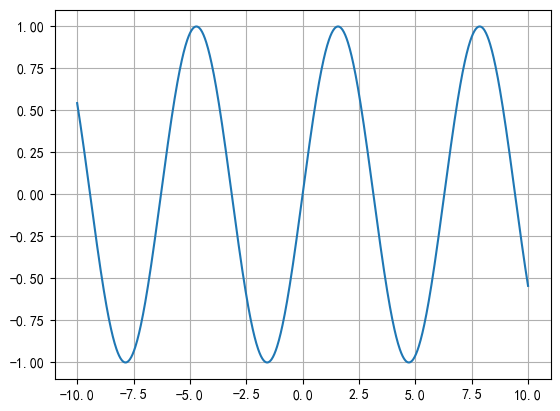

In [40]:
# 3. 绘制函数图像
plt.plot(x,y)
# 4. 网格显示和图像显示
plt.grid()
plt.show()

### 五、常见图形绘制
---

Matplotlib能够绘制折线图，散点图，柱状图，直方图，饼图

1. 折线图：api:plt.plot(x,y)

2. 散点图：api:plt.scatter(x,y)

3. 柱状图：api:plt.bar(x,y,width,align="center",**kwargs)

<code>x：需要传递的数量
    width：柱状图的宽度
    align：每个柱状图的对其方式
**kwargs：其他的一些参数，比如color：选择柱状图的颜色
</code>
4. 直方图：api:matplotlib.pyplot.hist(x,bins=None)
    <code>x:需要传递的数量
    bins：组距   
</code>
5. 饼图：plt.pie(x,labels=, autopct=, colors)
<code>x:数量
    labels：每部分名称
    autopct：占比显示指定%1.2f%%
    colors：每部分颜色
</code>
最后，颜色都可以有：brgycmykcgb

### 总结

- 添加x,y轴刻度
    - plt.xticks()
    - plt.yticks()
    - 注意：在传递进去的第一个参数必须是数字，不能是字符串，如果是字符串需要进行交替执行
- 添加网格显示
    - plt.grid(linestyle="--", alpha=0.5)
- 添加描述信息
    - plt.xlabel()
    - plt.ylabel()
    - plt.title()
- 图像保存
    - plt.savefig("路径")
- 一个坐标系绘制多个图像
    - 多次plot直接进行添加就行
- 显示图例
    - plt.legend(loc="best")
    - 注意一定要在plt.plot()里面设置一个label，如果不设置，没法显示,值可以是英文的也可以是中文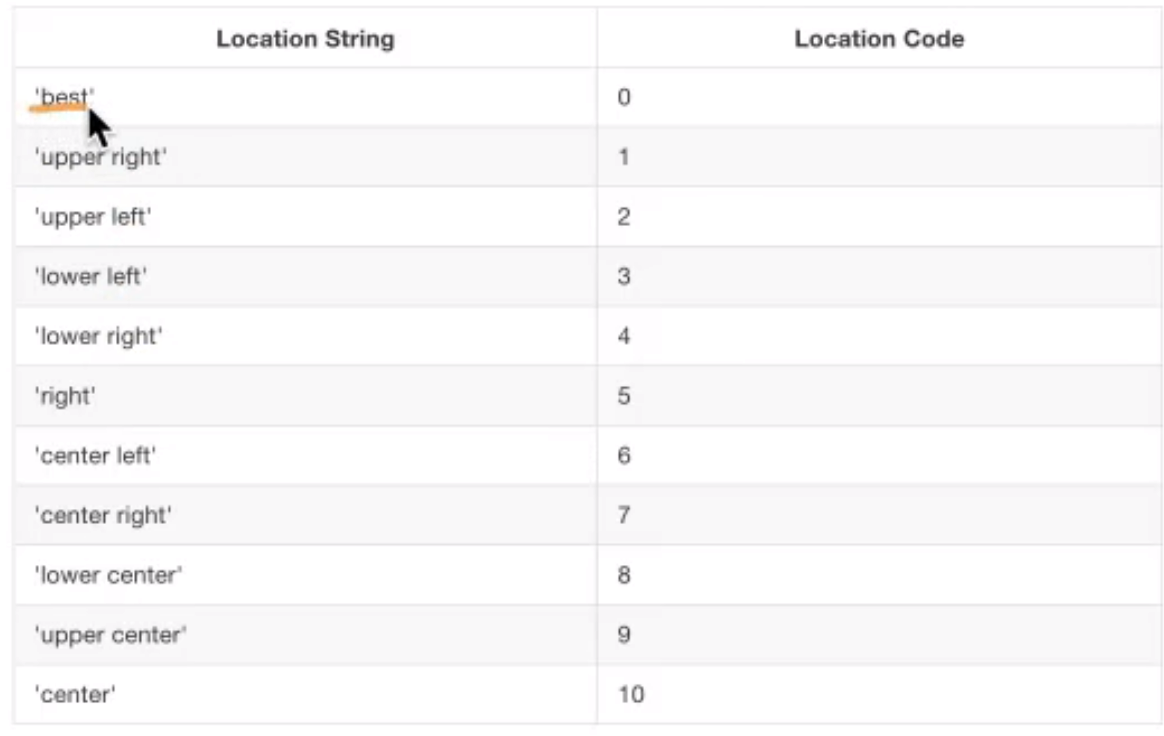
- 多个坐标系显示
    - plt.subplots(nrows=,ncols=)
    - 返回两个值
- 折线图的应用
    - 1. 应用于观察数据变化
    - 2. 可以画出一些数学函数图像